In [18]:
import pandas as pd
import requests

In [19]:
textile_df = pd.read_csv('../data/Fabric Sustainability Data - Textile Research.csv')
textile_df.head()

,material_id,conventional_material_id,source,preferred,biodegradable,microplastics,deforestation,forest_management,chemical_hazard,closed_loop_process,animal_cruelty,recycled,agricultural_impact,organic
0,COTTON,COTTON,plant,False,True,False,False,False,False,False,False,False,True,False
1,RECYCLED_COTTON,COTTON,plant,True,True,False,False,False,False,False,False,True,False,False
2,ORGANIC_COTTON,COTTON,plant,True,True,False,False,False,False,False,False,False,False,True
3,EGYPTIAN_COTTON,COTTON,plant,False,True,False,False,False,False,False,False,False,True,False
4,PIMA_COTTON,COTTON,plant,False,True,False,False,False,False,False,False,False,True,False


In [20]:
material_params = ["COTTON", "RECYCLED_COTTON", "ORGANIC_COTTON", "POLYESTER", "RECYCLED_POLYESTER", "NYLON", "RECYCLED_NYLON", "ACRYLIC", "SPANDEX", "FLAX", "LINEN", "HEMP", "CUPRO", "LYOCELL", "TENCEL_LYOCELL_LENZING", "REFIBRA_TENCEL_LYOCELL_LENZING", "MODAL", "TENCEL_MODAL_LENZING", "VISCOSE", "VISCOSE_BAMBOO", "VISCOSE_ASIA_LENZING", "VISCOSE_EU_LENZING", "SILK", "ALPACA", "WOOL", "RECYCLED_WOOL", "CASHMERE", "RECYCLED_CASHMERE"]

In [21]:
# only keep relevant rows (where material is in dropdown list)
textile_df = textile_df[textile_df['material_id'].isin(material_params)]
textile_df.head(10)

,material_id,conventional_material_id,source,preferred,biodegradable,microplastics,deforestation,forest_management,chemical_hazard,closed_loop_process,animal_cruelty,recycled,agricultural_impact,organic
0,COTTON,COTTON,plant,False,True,False,False,False,False,False,False,False,True,False
1,RECYCLED_COTTON,COTTON,plant,True,True,False,False,False,False,False,False,True,False,False
2,ORGANIC_COTTON,COTTON,plant,True,True,False,False,False,False,False,False,False,False,True
6,POLYESTER,POLYESTER,synthetic,False,False,True,False,False,False,False,False,False,False,False
7,RECYCLED_POLYESTER,POLYESTER,synthetic,True,False,True,False,False,False,False,False,True,False,False
8,ACRYLIC,ACRYLIC,synthetic,False,False,True,False,False,False,False,False,False,False,False
9,ALPACA,ALPACA,animal,False,True,False,False,False,False,False,True,False,False,False
10,SPANDEX,SPANDEX,synthetic,False,False,True,False,False,False,False,False,False,False,False
11,FLAX,FLAX,plant,False,True,False,False,False,False,False,False,False,False,False
13,LINEN,LINEN,plant,False,True,False,False,False,False,False,False,False,False,False


In [24]:
scraped_princess_polly = [{'item': 'Lydie cargo mini skirt beige', 'cotton': 100},
 {'item': 'Back in time top white', 'recycled nylon': 86, 'spandex': 14},
 {'item': 'Xena denim shorts', 'recycled cotton': 40, 'cotton': 60},
 {'item': 'Janea bikini bottoms rust', 'nylon': 85, 'spandex': 15},
 {'item': 'Janea bikini top rust', 'nylon': 85, 'spandex': 15},
 {'item': 'Kier oversized jacket denim mid wash', 'cotton': 100},
 {'item': 'Iconic cargo mini skirt white', 'cotton': 100},
 {'item': 'Layla high cut cheeky bikini bottoms navy',
  'polyester': 94,
 'spandex': 6},
 {'item': 'Callie faux leather jacket black', 'polyester': 55, 'acrylic’': 45},
 {'item': 'Jenner triangle bikini top deep purple',
  'recycled nylon': 80,
 'spandex': 20}]

In [33]:
scraped_data_shein = [{'item': 'SHEIN LUNE Women Floral Print Wide Leg Spring/Summer Casual And Elegant Trouser Beach Pants',
  'polyester': 95, 'spandex': 5},
 {'item': 'Pattern Printed Casual Round Neck T-Shirt', 'polyester': 100},
 {'item': "SHEIN LUNE Women's Floral Embroidered Sheer Mesh Open Front Jacket",
  'polyester': 100},
 {'item': 'SHEIN Maternity 2pcs/Set Casual Loose Round Neck T-Shirt With Elastic Waistband Shorts',
  'polyester': 96,
  'spandex': 4},
 {'item': 'Hollow Out Knit Crop Sweater With Bell Sleeve', 'acrylic': 100},
 {'item': 'ROMWE Fairycore Spring Summer Elegant Floral Print Mermaid Mesh Maxi Skirt',
  'polyester': 95, 'spandex': 5},
 {'item': "SHEIN LUNE Women's Vacation Style Allover Print Dress With Full Dress And Slit, Strapless",
  'polyester': 100},
 {'item': 'SHEIN Clasi Floral Print Tie Neck Flutter Sleeve Ruffle Hem Dress',
  'polyester': 100},
 {'item': "ADYCE Women's One Shoulder Pleated High Slit Cocktail Party Dress For Dancing Gala Dress",
  'polyester': 95,
  'spandex': 5},
 {'item': 'SHEIN Privé Solid Color Suit Set', 'polyester': 100}]


In [37]:
scraped_data_abercrombie = [{'item': 'Curve Love High Rise Dad Short', 'cotton': 99, 'spandex': 1},
 {'item': 'The A&F Scarlett Linen-Blend Wrap Mini Skort',
  'linen': 55,
  'viscose': 45},
 {'item': 'High Rise 4" Mom Short', 'cotton': 99, 'spandex': 1},
 {'item': 'Curve Love High Rise 4" Mom Short', 'cotton': 99, 'spandex': 1},
 {'item': 'The A&F Scarlett Linen-Blend Mini Skort',
  'linen': 55,
  'viscose': 45},
 {'item': 'A&F Sloane Tailored Pant',
  'polyester': 80,
  'viscose': 16,
  'spandex': 4},
 {'item': 'Curve Love High Rise 4" Mom Short', 'cotton': 99, 'spandex': 1},
 {'item': 'High Rise 4" Mom Short', 'cotton': 99, 'spandex': 1},
 {'item': 'Curve Love High Rise Dad Short', 'cotton': 99, 'spandex': 1},
 {'item': 'Curve Love High Rise 90s Cutoff Short',
  'cotton': 99,
  'spandex': 1}]



In [44]:
scraped_data_aritzia = [{'item': 'Pleated Mid-Thigh Short',
  'recycled polyester': 61,
  'viscose eu lenzing': 26,
  'cotton': 7,
  'spandex': 6},
 {'item': 'Eyecatcher Mini Dress', 'polyester': 95, 'spandex': 5},
 {'item': 'Contour Crew Cropped T-Shirt',
  'nylon': 94, 'spandex': 6},
 {'item': 'Pleated Mini Short',
  'recycled polyester': 61, 'viscose eu lenzing': 26, 'cotton': 7, 'spandex': 6},
 {'item': 'Eyecatcher Dress', 'polyester': 95, 'spandex': 5},
 {'item': 'Contour Flourish Top', 'nylon': 94, 'spandex': 6},
 {'item': 'Resolution Dress', 'cupro': 82, 'polyester': 18},
 {'item': 'Bureau Pant', 'wool': 95, 'spandex': 5, 'polyester': 100},
 {'item': 'Tuberose Dress', 'recycled polyester': 100},
 {'item': 'Lodge Linen Pant', 'tencel lyocell lenzing': 66, 'linen': 34}]

In [48]:
scraped_data_uniqlo = [{'item': 'U AIRism Cotton Oversized Crew Neck Half-Sleeve T-Shirt',
  'cotton': 53,
  'polyester': 17,
  'recycled polyester': 30},
 {'item': 'Ribbed Cropped Sleeveless Bra Top',
  'cotton': 97,
  'spandex': 3},
 {'item': 'U Crew Neck T-Shirt', 'cotton': 100},
 {'item': 'Mini Short Sleeve T-Shirt', 'cotton': 96, 'spandex': 4},
 {'item': 'Premium Linen Long Sleeve Shirt', 'linen': 100},
 {'item': 'Ultra Stretch AIRism Cropped T-Shirt',
  'recycled polyester': 77,
  'spandex': 23,},
 {'item': 'Star Wars: Remastered by Kosuke Kawamura UT (Short-Sleeve Graphic T-Shirt)',
  'cotton': 75,
  'recycled cotton': 25},
 {'item': 'AIRism Cropped Bra Tube Top',
  'cotton': 53,
  'nylon': 37,
  'spandex': 10},
 {'item': 'Washable Knit Ribbed Long-Sleeve Cardigan',
  'viscose': 53,
  'polyester': 24,
  'nylon': 23},
 {'item': 'Washable Knit Ribbed Pants',
  'viscose': 53,
  'polyester': 24,
  'nylon': 23}]

In [52]:
scraped_data_skims = [{'item': 'Cotton Jersey T Shirt Light Heather Grey', 'cotton': 90, 'spandex': 10}, 
    {'item': 'Soft Smoothing Seamless T Shirt Onyx', 'nylon': 93, 'spandex': 7}, 
    {'item': 'Soft Lounge Tank Onyx', 'modal': 91, 'spandex': 9}, 
    {'item': 'Boyfriend Long Sleeve T Shirt Onyx', 'cotton': 47, 'modal': 48, 'spandex': 5}, 
    {'item': 'Soft Lounge Long Slip Dress Onyx', 'modal': 91, 'spandex': 9}, 
    {'item': 'Fits Everybody Scoop Bralette Onyx', 'nylon': 76, 'spandex': 24}, 
    {'item': 'Fits Everybody High Neck Bodysuit Onyx', 'nylon': 76, 'spandex': 24}, 
    {'item': 'Essential Long Sleeve Scoop Neck Bodysuit Onyx', 'nylon': 95, 'spandex': 5}, 
    {'item': 'Essential Crew Neck Long Sleeve Bodysuit Onyx', 'nylon': 95, 'spandex': 5}, 
    {'item': 'Signature Swim Dipped Tie Bottom Onyx', 'recycled nylon': 76, 'spandex': 24}]


In [56]:
scraped_data_brandy = [{'item': 'Anastasia Sweatpants', 'cotton': 100},
 {'item': 'Rosa Sweatpants', 'cotton': 82, 'polyester': 18},
 {'item': 'Beyonca Crop Tank', 'cotton': 100},
 {'item': 'Priscilla Pants', 'cotton': 96, 'spandex': 4},
 {'item': 'Christy Hoodie', 'cotton': 70, 'polyester': 30},
 {'item': 'Bella Top', 'cotton': 100},
 {'item': 'Brianna Cotton Thick Stripe Sweater', 'cotton': 100},
 {'item': 'Boy Short Heart Underwear', 'cotton': 96, 'spandex': 4},
 {'item': 'Bonnie Top', 'cotton': 96, 'spandex': 4},
 {'item': 'Lydia Tank', 'cotton': 96, 'spandex': 4}]


In [61]:
scraped_data_f21 = [{'item': 'Crochet Hello Kitty Midi Dress', 'viscose': 79, 'nylon': 21},
 {'item': 'Sequin Hello Kitty Mesh Tee', 'cotton': 100},
 {'item': 'Rhinestone Badtz-Maru Graphic Tee', 'cotton': 93, 'spandex': 7},
 {'item': 'Hello Kitty Ringer Shorts', 'viscose': 80, 'polyester': 20},
 {'item': 'Striped Hello Kitty Shorts', 'viscose': 80, 'polyester': 20},
 {'item': 'Floral Off-the-Shoulder Midi Dress', 'viscose': 100},
 {'item': 'Tiered Sweetheart Maxi Dress', 'polyester': 100},
 {'item': 'Tube Mini Dress',
   'viscose': 86,
   'linen': 11,
   'spandex': 3},
 {'item': 'Stretch-Denim Notched Vest', 'polyester': 100},
 {'item': 'Denim Button-Up Crop Top',
   'cotton': 65,
   'polyester': 33,
   'spandex': 2}]

In [66]:
scraped_data_alo = [{'item': 'Airlift Ribbed Jump Start V-Neck Bra',
  'polyester': 82,
  'spandex': 18},
 {'item': '7/8 High-Waist Airlift Legging', 'polyester': 82, 'spandex': 18},
 {'item': 'Alosoft Crop Finesse Short Sleeve',
  'polyester': 87,
  'spandex': 13},
 {'item': 'Airbrush High-Waist 5" Biker Short', 'nylon': 87, 'spandex': 13},
 {'item': 'Airlift Intrigue Bra', 'polyester': 82, 'spandex': 18},
 {'item': 'Alosoft Backspin Dress', 'polyester': 87, 'spandex': 13},
 {'item': '3" High-Waist Airlift Short', 'polyester': 82, 'spandex': 18},
 {'item': 'Accolade Straight Leg Sweatpant', 'cotton': 65, 'polyester': 35},
 {'item': 'Match Point Tennis Skirt', 'polyester': 92, 'spandex': 8},
 {'item': 'Accolade Crew Neck Pullover', 'cotton': 65, 'polyester': 35}]


In [70]:
scraped_data_boohoo = [
 {'item': 'Crochet Contrast Scallop Scoop Beach Dress', 'acrylic': 100},
 {'item': 'Text Print Hooded Short Tracksuit',
   'polyester': 50,
   'cotton': 50},
 {'item': 'Mesh Square Neck Ruched Midi Dress', 'polyester': 100},
 {'item': 'Recycled Oversized Sweater Joggers',
   'cotton': 70,
   'polyester': 30},
 {'item': 'Essentials Split Leg Maxi Beach Skirt', 'polyester': 100},
 {'item': 'Puff One Shoulder Side Split Maxi Dress', 'polyester': 100},
 {'item': 'Recycled Oversized Sweater Joggers',
   'cotton': 70,
   'polyester': 30},
 {'item': 'Recycled Oversized Sweater Joggers',
   'cotton': 70,
   'polyester': 30},
 {'item': 'Plus Basic Plunge Rib Bodysuit', 'polyester': 95, 'spandex': 5},
 {'item': 'Maternity Strappy Cowl Neck Dress And Duster Coat',
   'polyester': 95,
   'spandex': 5}]


In [71]:
def get_material_score(item) -> float:
    materials_and_percents = {(key.replace(' ', '_')).upper(): value for key, value in item.items() if key != 'item'}
    material_weight = 1/3
    end_of_life_weight = 1/3
    agr_impact_weight = 1/3
    material_percent_sum = 0
    eol_percent_sum = 0
    agr_impact_sum = 0

    for material, percent in materials_and_percents.items():
        normalized_percent = percent / 100
        
        # Check if material id exists in textile_df
        if material not in textile_df['material_id'].values:
            continue  # Skip this material if not found in textile_df

        preferred_value = textile_df.loc[textile_df['material_id'] == material, 'preferred'].values[0]
        if preferred_value:
            material_percent_sum += normalized_percent

        biodegradable_value = textile_df.loc[textile_df['material_id'] == material, 'biodegradable'].values[0]
        if biodegradable_value:
            eol_percent_sum += normalized_percent

        agr_impact_value = textile_df.loc[textile_df['material_id'] == material, 'agricultural_impact'].values[0]
        if not agr_impact_value:
            agr_impact_sum += normalized_percent

    material_score = material_weight * material_percent_sum
    end_of_life_score = end_of_life_weight * eol_percent_sum
    agricultural_impact_score = agr_impact_weight * agr_impact_sum
    final_score = 5 * (material_score + end_of_life_score + agricultural_impact_score)

    return final_score

def add_score_to_items(items):
    for item in items:
        item_score = get_material_score(item)
        item['score'] = item_score

# Test the function with scraped and add scores to the items
add_score_to_items(scraped_data_boohoo)

print(scraped_data_boohoo)


[{'item': 'Crochet Contrast Scallop Scoop Beach Dress', 'acrylic': 100, 'score': 1.6666666666666665}, {'item': 'Text Print Hooded Short Tracksuit', 'polyester': 50, 'cotton': 50, 'score': 1.6666666666666665}, {'item': 'Mesh Square Neck Ruched Midi Dress', 'polyester': 100, 'score': 1.6666666666666665}, {'item': 'Recycled Oversized Sweater Joggers', 'cotton': 70, 'polyester': 30, 'score': 1.6666666666666665}, {'item': 'Essentials Split Leg Maxi Beach Skirt', 'polyester': 100, 'score': 1.6666666666666665}, {'item': 'Puff One Shoulder Side Split Maxi Dress', 'polyester': 100, 'score': 1.6666666666666665}, {'item': 'Recycled Oversized Sweater Joggers', 'cotton': 70, 'polyester': 30, 'score': 1.6666666666666665}, {'item': 'Recycled Oversized Sweater Joggers', 'cotton': 70, 'polyester': 30, 'score': 1.6666666666666665}, {'item': 'Plus Basic Plunge Rib Bodysuit', 'polyester': 95, 'spandex': 5, 'score': 1.6666666666666665}, {'item': 'Maternity Strappy Cowl Neck Dress And Duster Coat', 'polyest

In [73]:
scraped_data_boohoo = [{'item': 'Crochet Contrast Scallop Scoop Beach Dress',
  'acrylic': 100,
  'score': 1.6666666666666665},
 {'item': 'Text Print Hooded Short Tracksuit',
  'polyester': 50,
  'cotton': 50,
  'score': 1.6666666666666665},
 {'item': 'Mesh Square Neck Ruched Midi Dress',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'Recycled Oversized Sweater Joggers',
  'cotton': 70,
  'polyester': 30,
  'score': 1.6666666666666665},
 {'item': 'Essentials Split Leg Maxi Beach Skirt',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'Puff One Shoulder Side Split Maxi Dress',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'Recycled Oversized Sweater Joggers',
  'cotton': 70,
  'polyester': 30,
  'score': 1.6666666666666665},
 {'item': 'Recycled Oversized Sweater Joggers',
  'cotton': 70,
  'polyester': 30,
  'score': 1.6666666666666665},
 {'item': 'Plus Basic Plunge Rib Bodysuit',
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'Maternity Strappy Cowl Neck Dress And Duster Coat',
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665}]

In [69]:
scraped_data_alo = [{'item': 'Airlift Ribbed Jump Start V-Neck Bra',
  'polyester': 82,
  'spandex': 18,
  'score': 1.6666666666666665},
 {'item': '7/8 High-Waist Airlift Legging',
  'polyester': 82,
  'spandex': 18,
  'score': 1.6666666666666665},
 {'item': 'Alosoft Crop Finesse Short Sleeve',
  'polyester': 87,
  'spandex': 13,
  'score': 1.6666666666666665},
 {'item': 'Airbrush High-Waist 5" Biker Short',
  'nylon': 87,
  'spandex': 13,
  'score': 1.6666666666666665},
 {'item': 'Airlift Intrigue Bra',
  'polyester': 82,
  'spandex': 18,
  'score': 1.6666666666666665},
 {'item': 'Alosoft Backspin Dress',
  'polyester': 87,
  'spandex': 13,
  'score': 1.6666666666666665},
 {'item': '3" High-Waist Airlift Short',
  'polyester': 82,
  'spandex': 18,
  'score': 1.6666666666666665},
 {'item': 'Accolade Straight Leg Sweatpant',
  'cotton': 65,
  'polyester': 35,
  'score': 1.6666666666666665},
 {'item': 'Match Point Tennis Skirt',
  'polyester': 92,
  'spandex': 8,
  'score': 1.6666666666666665},
 {'item': 'Accolade Crew Neck Pullover',
  'cotton': 65,
  'polyester': 35,
  'score': 1.6666666666666665}]

In [64]:
scraped_data_f21 = [{'item': 'Crochet Hello Kitty Midi Dress',
  'viscose': 79,
  'nylon': 21,
  'score': 2.9833333333333334},
 {'item': 'Sequin Hello Kitty Mesh Tee',
  'cotton': 100,
  'score': 1.6666666666666665},
 {'item': 'Rhinestone Badtz-Maru Graphic Tee',
  'cotton': 93,
  'spandex': 7,
  'score': 1.6666666666666665},
 {'item': 'Hello Kitty Ringer Shorts',
  'viscose': 80,
  'polyester': 20,
  'score': 3.0},
 {'item': 'Striped Hello Kitty Shorts',
  'viscose': 80,
  'polyester': 20,
  'score': 3.0},
 {'item': 'Floral Off-the-Shoulder Midi Dress',
  'viscose': 100,
  'score': 3.333333333333333},
 {'item': 'Tiered Sweetheart Maxi Dress',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'Tube Mini Dress',
  'viscose': 86,
  'linen': 11,
  'spandex': 3,
  'score': 3.283333333333333},
 {'item': 'Stretch-Denim Notched Vest',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'Denim Button-Up Crop Top',
  'cotton': 65,
  'polyester': 33,
  'spandex': 2,
  'score': 1.666666666666667}]

In [59]:
scraped_data_brandy = [{'item': 'Anastasia Sweatpants', 'cotton': 100, 'score': 1.6666666666666665},
 {'item': 'Rosa Sweatpants',
  'cotton': 82,
  'polyester': 18,
  'score': 1.6666666666666665},
 {'item': 'Beyonca Crop Tank', 'cotton': 100, 'score': 1.6666666666666665},
 {'item': 'Priscilla Pants',
  'cotton': 96,
  'spandex': 4,
  'score': 1.6666666666666663},
 {'item': 'Christy Hoodie',
  'cotton': 70,
  'polyester': 30,
  'score': 1.6666666666666665},
 {'item': 'Bella Top', 'cotton': 100, 'score': 1.6666666666666665},
 {'item': 'Brianna Cotton Thick Stripe Sweater',
  'cotton': 100,
  'score': 1.6666666666666665},
 {'item': 'Boy Short Heart Underwear',
  'cotton': 96,
  'spandex': 4,
  'score': 1.6666666666666663},
 {'item': 'Bonnie Top',
  'cotton': 96,
  'spandex': 4,
  'score': 1.6666666666666663},
 {'item': 'Lydia Tank',
  'cotton': 96,
  'spandex': 4,
  'score': 1.6666666666666663}]

In [55]:
scraped_data_skims = [{'item': 'Cotton Jersey T Shirt Light Heather Grey',
  'cotton': 90,
  'spandex': 10,
  'score': 1.6666666666666665},
 {'item': 'Soft Smoothing Seamless T Shirt Onyx',
  'nylon': 93,
  'spandex': 7,
  'score': 1.6666666666666665},
 {'item': 'Soft Lounge Tank Onyx',
  'modal': 91,
  'spandex': 9,
  'score': 3.1833333333333336},
 {'item': 'Boyfriend Long Sleeve T Shirt Onyx',
  'cotton': 47,
  'modal': 48,
  'spandex': 5,
  'score': 2.4666666666666663},
 {'item': 'Soft Lounge Long Slip Dress Onyx',
  'modal': 91,
  'spandex': 9,
  'score': 3.1833333333333336},
 {'item': 'Fits Everybody Scoop Bralette Onyx',
  'nylon': 76,
  'spandex': 24,
  'score': 1.6666666666666665},
 {'item': 'Fits Everybody High Neck Bodysuit Onyx',
  'nylon': 76,
  'spandex': 24,
  'score': 1.6666666666666665},
 {'item': 'Essential Long Sleeve Scoop Neck Bodysuit Onyx',
  'nylon': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'Essential Crew Neck Long Sleeve Bodysuit Onyx',
  'nylon': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'Signature Swim Dipped Tie Bottom Onyx',
  'recycled nylon': 76,
  'spandex': 24,
  'score': 2.9333333333333336}]

In [51]:
scraped_data_uniqlo = [{'item': 'U AIRism Cotton Oversized Crew Neck Half-Sleeve T-Shirt',
  'cotton': 53,
  'polyester': 17,
  'recycled polyester': 30,
  'score': 2.166666666666667},
 {'item': 'Ribbed Cropped Sleeveless Bra Top',
  'cotton': 97,
  'spandex': 3,
  'score': 1.6666666666666665},
 {'item': 'U Crew Neck T-Shirt', 'cotton': 100, 'score': 1.6666666666666665},
 {'item': 'Mini Short Sleeve T-Shirt',
  'cotton': 96,
  'spandex': 4,
  'score': 1.6666666666666663},
 {'item': 'Premium Linen Long Sleeve Shirt',
  'linen': 100,
  'score': 3.333333333333333},
 {'item': 'Ultra Stretch AIRism Cropped T-Shirt',
  'recycled polyester': 77,
  'spandex': 23,
  'score': 2.9499999999999997},
 {'item': 'Star Wars: Remastered by Kosuke Kawamura UT (Short-Sleeve Graphic T-Shirt)',
  'cotton': 75,
  'recycled cotton': 25,
  'score': 2.4999999999999996},
 {'item': 'AIRism Cropped Bra Tube Top',
  'cotton': 53,
  'nylon': 37,
  'spandex': 10,
  'score': 1.6666666666666665},
 {'item': 'Washable Knit Ribbed Long-Sleeve Cardigan',
  'viscose': 53,
  'polyester': 24,
  'nylon': 23,
  'score': 2.55},
 {'item': 'Washable Knit Ribbed Pants',
  'viscose': 53,
  'polyester': 24,
  'nylon': 23,
  'score': 2.55}]

In [47]:
scraped_data_aritzia = [{'item': 'Pleated Mid-Thigh Short',
  'recycled polyester': 61,
  'viscose eu lenzing': 26,
  'cotton': 7,
  'spandex': 6,
  'score': 3.55},
 {'item': 'Eyecatcher Mini Dress',
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'Contour Crew Cropped T-Shirt',
  'nylon': 94,
  'spandex': 6,
  'score': 1.6666666666666665},
 {'item': 'Pleated Mini Short',
  'recycled polyester': 61,
  'viscose eu lenzing': 26,
  'cotton': 7,
  'spandex': 6,
  'score': 3.55},
 {'item': 'Eyecatcher Dress',
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'Contour Flourish Top',
  'nylon': 94,
  'spandex': 6,
  'score': 1.6666666666666665},
 {'item': 'Resolution Dress',
  'cupro': 82,
  'polyester': 18,
  'score': 3.033333333333333},
 {'item': 'Bureau Pant',
  'wool': 95,
  'spandex': 5,
  'polyester': 100,
  'score': 4.916666666666666},
 {'item': 'Tuberose Dress',
  'recycled polyester': 100,
  'score': 3.333333333333333},
 {'item': 'Lodge Linen Pant',
  'tencel lyocell lenzing': 66,
  'linen': 34,
  'score': 4.433333333333334}]

In [40]:
scraped_data_abercrombie = [{'item': 'Curve Love High Rise Dad Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665},
 {'item': 'The A&F Scarlett Linen-Blend Wrap Mini Skort',
  'linen': 55,
  'viscose': 45,
  'score': 3.333333333333333},
 {'item': 'High Rise 4" Mom Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665},
 {'item': 'Curve Love High Rise 4" Mom Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665},
 {'item': 'The A&F Scarlett Linen-Blend Mini Skort',
  'linen': 55,
  'viscose': 45,
  'score': 3.333333333333333},
 {'item': 'A&F Sloane Tailored Pant',
  'polyester': 80,
  'viscose': 16,
  'spandex': 4,
  'score': 1.9333333333333333},
 {'item': 'Curve Love High Rise 4" Mom Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665},
 {'item': 'High Rise 4" Mom Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665},
 {'item': 'Curve Love High Rise Dad Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665},
 {'item': 'Curve Love High Rise 90s Cutoff Short',
  'cotton': 99,
  'spandex': 1,
  'score': 1.6666666666666665}]

In [36]:
scraped_data_shein = [{'item': 'SHEIN LUNE Women Floral Print Wide Leg Spring/Summer Casual And Elegant Trouser Beach Pants',
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'Pattern Printed Casual Round Neck T-Shirt',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': "SHEIN LUNE Women's Floral Embroidered Sheer Mesh Open Front Jacket",
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'SHEIN Maternity 2pcs/Set Casual Loose Round Neck T-Shirt With Elastic Waistband Shorts',
  'polyester': 96,
  'spandex': 4,
  'score': 1.6666666666666665},
 {'item': 'Hollow Out Knit Crop Sweater With Bell Sleeve',
  'acrylic': 100,
  'score': 1.6666666666666665},
 {'item': 'ROMWE Fairycore Spring Summer Elegant Floral Print Mermaid Mesh Maxi Skirt',
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': "SHEIN LUNE Women's Vacation Style Allover Print Dress With Full Dress And Slit, Strapless",
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': 'SHEIN Clasi Floral Print Tie Neck Flutter Sleeve Ruffle Hem Dress',
  'polyester': 100,
  'score': 1.6666666666666665},
 {'item': "ADYCE Women's One Shoulder Pleated High Slit Cocktail Party Dress For Dancing Gala Dress",
  'polyester': 95,
  'spandex': 5,
  'score': 1.6666666666666665},
 {'item': 'SHEIN Privé Solid Color Suit Set',
  'polyester': 100,
  'score': 1.6666666666666665}]

In [32]:
scraped_princess_polly = [{'item': 'Lydie cargo mini skirt beige',
  'cotton': 100,
  'score': 1.6666666666666665},
 {'item': 'Back in time top white',
  'recycled nylon': 86,
  'spandex': 14,
  'score': 3.0999999999999996},
 {'item': 'Xena denim shorts',
  'recycled cotton': 40,
  'cotton': 60,
  'score': 3.0},
 {'item': 'Janea bikini bottoms rust',
  'nylon': 85,
  'spandex': 15,
  'score': 1.6666666666666665},
 {'item': 'Janea bikini top rust',
  'nylon': 85,
  'spandex': 15,
  'score': 1.6666666666666665},
 {'item': 'Kier oversized jacket denim mid wash',
  'cotton': 100,
  'score': 1.6666666666666665},
 {'item': 'Iconic cargo mini skirt white',
  'cotton': 100,
  'score': 1.6666666666666665},
 {'item': 'Layla high cut cheeky bikini bottoms navy',
  'polyester': 94,
  'spandex': 6,
  'score': 1.6666666666666665},
 {'item': 'Callie faux leather jacket black',
  'polyester': 55,
  'acrylic’': 45,
  'score': 0.9166666666666667},
 {'item': 'Jenner triangle bikini top deep purple',
  'recycled nylon': 80,
  'spandex': 20,
  'score': 3.0}]

In [76]:
import pandas as pd

for item in scraped_data_boohoo:
    item['source'] = 'boohoo'
for item in scraped_data_alo:
    item['source'] = 'alo'
for item in scraped_data_abercrombie:
    item['source'] = 'abercrombie & fitch'
for item in scraped_data_aritzia:
    item['source'] = 'aritzia'
for item in scraped_data_brandy:
    item['source'] = 'brandy melville'
for item in scraped_data_f21:
    item['source'] = 'forever 21'
for item in scraped_data_shein:
    item['source'] = 'shein'
for item in scraped_data_skims:
    item['source'] = 'skims'
for item in scraped_data_uniqlo:
    item['source'] = 'uniqlo'
for item in scraped_princess_polly:
    item['source'] = 'princess polly'

combined_data = scraped_data_boohoo + scraped_data_alo + scraped_data_abercrombie + scraped_data_aritzia + scraped_data_brandy + scraped_data_f21 + scraped_data_shein + scraped_data_skims + scraped_data_uniqlo + scraped_princess_polly

df_scores_brands = pd.DataFrame(combined_data)

print(df_scores_brands)


                                          item  acrylic     score   
0   Crochet Contrast Scallop Scoop Beach Dress    100.0  1.666667  \
1            Text Print Hooded Short Tracksuit      NaN  1.666667   
2           Mesh Square Neck Ruched Midi Dress      NaN  1.666667   
3           Recycled Oversized Sweater Joggers      NaN  1.666667   
4        Essentials Split Leg Maxi Beach Skirt      NaN  1.666667   
..                                         ...      ...       ...   
95        Kier oversized jacket denim mid wash      NaN  1.666667   
96               Iconic cargo mini skirt white      NaN  1.666667   
97   Layla high cut cheeky bikini bottoms navy      NaN  1.666667   
98            Callie faux leather jacket black      NaN  0.916667   
99      Jenner triangle bikini top deep purple      NaN  3.000000   

            source  polyester  cotton  spandex  nylon  linen  viscose   
0           boohoo        NaN     NaN      NaN    NaN    NaN      NaN  \
1           boohoo       

In [77]:
df_scores_brands

,item,acrylic,score,source,polyester,cotton,spandex,nylon,linen,viscose,recycled polyester,viscose eu lenzing,cupro,wool,tencel lyocell lenzing,modal,recycled nylon,recycled cotton,acrylic’
0,Crochet Contrast Scallop Scoop Beach Dress,100.0,1.666667,boohoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Text Print Hooded Short Tracksuit,NaN,1.666667,boohoo,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mesh Square Neck Ruched Midi Dress,NaN,1.666667,boohoo,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Recycled Oversized Sweater Joggers,NaN,1.666667,boohoo,30.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Essentials Split Leg Maxi Beach Skirt,NaN,1.666667,boohoo,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kier oversized jacket denim mid wash,NaN,1.666667,princess polly,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Iconic cargo mini skirt white,NaN,1.666667,princess polly,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Layla high cut cheeky bikini bottoms navy,NaN,1.666667,princess polly,94.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Callie faux leather jacket black,NaN,0.916667,princess polly,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [78]:
all_brands_df = pd.read_csv("../data/all_brand_ratings.csv")

In [79]:
all_brands_df

,brand,es_rating,es_transparency,es_fair_labor,es_sustainably_made,sr_rating,sr_description,goy_rating,goy_planet,goy_people,...,goy_description,goyr_rating,goyr_planet,goyr_people,goyr_animals,goyr_description,total_ratings,price_level,location,url
0,KNOWN SUPPLY,1.7,1.7,5.0,1.7,4.0,"<a data-wpel-link=""external"" href=""https://kno...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.850000,2.0,United States,https://directory.goodonyou.eco/brand/known-su...
1,AMENDI,1.7,5.0,3.3,1.7,4.0,AMENDI is a brand that is making commendable e...,NaN,NaN,NaN,...,NaN,4.0,4.0,3.0,4.0,AMENDI's environment rating is 'good'. It uses...,3.233333,3.0,Sweden,https://directory.goodonyou.eco/brand/amendi
2,SANVT,1.7,5.0,1.7,1.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,NaN,NaN
3,Patagonia,5.0,5.0,5.0,5.0,4.0,Patagonia is a brand that focuses on sustainab...,4.0,4.0,2.0,...,Our “Planet” rating evaluates brands based on ...,4.0,4.0,2.0,4.0,Our “Planet” rating evaluates brands based on ...,4.250000,3.0,United States,https://directory.goodonyou.eco/brand/patagonia
4,Scotch & Soda,3.3,5.0,3.3,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,2.0,Australia,https://directory.goodonyou.eco/brand/scotch-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,We Are HAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,2.0,NaN,Our “Planet” rating evaluates brands based on ...,3.000000,3.0,United States,https://directory.goodonyou.eco/brand/we-are-hah
1323,Erin Snow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,2.0,3.0,Our “Planet” rating evaluates brands based on ...,3.000000,4.0,United States,https://directory.goodonyou.eco/brand/erin-snow
1324,Macpac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,2.0,3.0,4.0,Macpac is owned by Super Retail Group. Its env...,3.000000,2.0,Australia,https://directory.goodonyou.eco/brand/macpac
1325,Pour Les Femmes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,2.0,4.0,4.0,Our “Planet” rating evaluates brands based on ...,3.000000,4.0,United States,https://directory.goodonyou.eco/brand/pour-les...


In [84]:
ten_largest_brands = [
    "princess polly",
    "shein",
    "abercrombie & fitch",
    "aritzia",
    "skims",
    "brandy melville",
    "forever 21",
    "alo",
    "boohoo",
    "uniqlo" 
]
all_brands_df["brand"] = all_brands_df.brand.str.lower()
ten_largest_brands = [brand.lower() for brand in ten_largest_brands]

filtered_df = all_brands_df[all_brands_df['brand'].isin(ten_largest_brands)]
filtered_df

,brand,es_rating,es_transparency,es_fair_labor,es_sustainably_made,sr_rating,sr_description,goy_rating,goy_planet,goy_people,...,goy_description,goyr_rating,goyr_planet,goyr_people,goyr_animals,goyr_description,total_ratings,price_level,location,url
1177,princess polly,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,Our “Planet” rating evaluates brands based on ...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Australia,https://directory.goodonyou.eco/brand/princess...
1178,brandy melville,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,This brand provides insufficient relevant info...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,United States,https://directory.goodonyou.eco/brand/brandy-m...
1179,shein,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,Our “Planet” rating evaluates brands based on ...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,China,https://directory.goodonyou.eco/brand/shein
1180,abercrombie & fitch,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,Abercrombie & Fitch is owned by Abercrombie Ab...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,United States,https://directory.goodonyou.eco/brand/abercrom...
1183,forever 21,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,Forever 21 is owned by Authentic Brands Group....,NaN,NaN,NaN,NaN,NaN,1.0,2.0,United States,https://directory.goodonyou.eco/brand/forever-21
1185,alo,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,Alo's environment rating is 'very poor'. It us...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,United States,https://directory.goodonyou.eco/brand/alo
1190,aritzia,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,Our “Planet” rating evaluates brands based on ...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,Canada,https://directory.goodonyou.eco/brand/aritzia
1191,uniqlo,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,...,Uniqlo is owned by Fast Retailing.Our “Planet”...,3.0,3.0,3.0,2.0,Uniqlo is owned by Fast Retailing.Our “Planet”...,3.0,1.0,Japan,https://directory.goodonyou.eco/brand/uniqlo
1238,boohoo,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,boohoo's environment rating is 'not good enoug...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,United Kingdom,https://directory.goodonyou.eco/brand/boohoo


In [94]:
avg_ratings_brands = filtered_df[["brand", "total_ratings"]]

In [106]:
avg_ratings_brands

,brand,total_ratings
1177,princess polly,2.0
1178,brandy melville,1.0
1179,shein,1.0
1180,abercrombie & fitch,2.0
1183,forever 21,1.0
1185,alo,1.0
1190,aritzia,2.0
1191,uniqlo,3.0
1238,boohoo,2.0
10,skims,1.0


In [124]:
df_scores_brands

,item,acrylic,score,brand,polyester,cotton,spandex,nylon,linen,viscose,recycled polyester,viscose eu lenzing,cupro,wool,tencel lyocell lenzing,modal,recycled nylon,recycled cotton,acrylic’
0,Crochet Contrast Scallop Scoop Beach Dress,100.0,1.666667,boohoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Text Print Hooded Short Tracksuit,NaN,1.666667,boohoo,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mesh Square Neck Ruched Midi Dress,NaN,1.666667,boohoo,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Recycled Oversized Sweater Joggers,NaN,1.666667,boohoo,30.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Essentials Split Leg Maxi Beach Skirt,NaN,1.666667,boohoo,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kier oversized jacket denim mid wash,NaN,1.666667,princess polly,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Iconic cargo mini skirt white,NaN,1.666667,princess polly,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Layla high cut cheeky bikini bottoms navy,NaN,1.666667,princess polly,94.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Callie faux leather jacket black,NaN,0.916667,princess polly,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [125]:
merged_df = pd.merge(avg_ratings_brands, df_scores_brands, on="brand", how="inner")


data = merged_df[["brand", "total_ratings", "item", "score"]]
data.brand.value_counts()

brand
princess polly         10
brandy melville        10
shein                  10
abercrombie & fitch    10
forever 21             10
alo                    10
aritzia                10
uniqlo                 10
boohoo                 10
skims                  10
Name: count, dtype: int64

In [129]:
data['brand'] = data['brand'].str.title()
data.item = data.item.str.title()
data

/var/folders/zm/6b4bzt5d6m7clb0b4qss1pc40000gn/T/ipykernel_53402/2303088125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'] = data['brand'].str.title()
/var/folders/zm/6b4bzt5d6m7clb0b4qss1pc40000gn/T/ipykernel_53402/2303088125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.item = data.item.str.title()


,brand,total_ratings,item,score
0,Princess Polly,2.0,Lydie Cargo Mini Skirt Beige,1.666667
1,Princess Polly,2.0,Back In Time Top White,3.100000
2,Princess Polly,2.0,Xena Denim Shorts,3.000000
3,Princess Polly,2.0,Janea Bikini Bottoms Rust,1.666667
4,Princess Polly,2.0,Janea Bikini Top Rust,1.666667
...,...,...,...,...
95,Skims,1.0,Fits Everybody Scoop Bralette Onyx,1.666667
96,Skims,1.0,Fits Everybody High Neck Bodysuit Onyx,1.666667
97,Skims,1.0,Essential Long Sleeve Scoop Neck Bodysuit Onyx,1.666667
98,Skims,1.0,Essential Crew Neck Long Sleeve Bodysuit Onyx,1.666667


In [138]:
data.to_csv("jasmine_mid_term_viz.csv")

In [130]:
import seaborn as sns

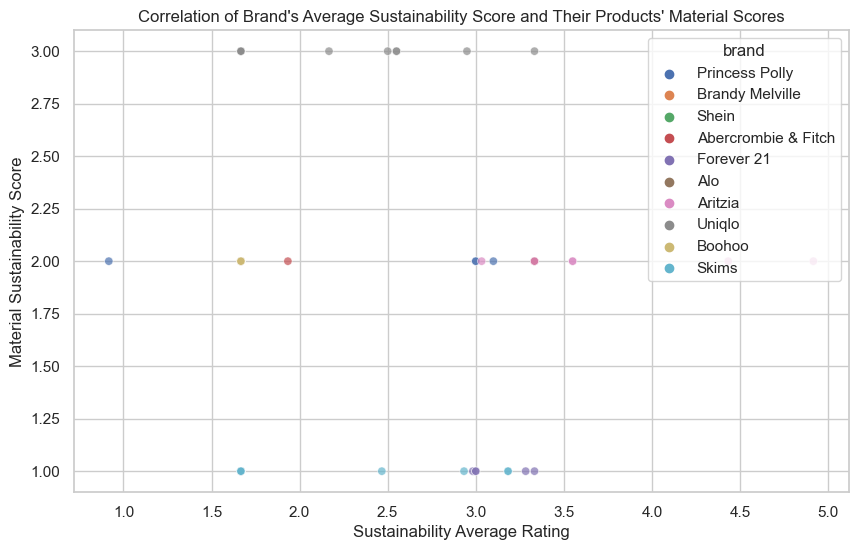

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='score', y='total_ratings', hue='brand', alpha=0.7)
plt.xlabel('Sustainability Average Rating')
plt.ylabel('Material Sustainability Score')
plt.title("Correlation of Brand's Average Sustainability Score and Their Products' Material Scores")
plt.show()


In [141]:
data

,brand,total_ratings,item,score
0,Princess Polly,2.0,Lydie Cargo Mini Skirt Beige,1.666667
1,Princess Polly,2.0,Back In Time Top White,3.100000
2,Princess Polly,2.0,Xena Denim Shorts,3.000000
3,Princess Polly,2.0,Janea Bikini Bottoms Rust,1.666667
4,Princess Polly,2.0,Janea Bikini Top Rust,1.666667
...,...,...,...,...
95,Skims,1.0,Fits Everybody Scoop Bralette Onyx,1.666667
96,Skims,1.0,Fits Everybody High Neck Bodysuit Onyx,1.666667
97,Skims,1.0,Essential Long Sleeve Scoop Neck Bodysuit Onyx,1.666667
98,Skims,1.0,Essential Crew Neck Long Sleeve Bodysuit Onyx,1.666667


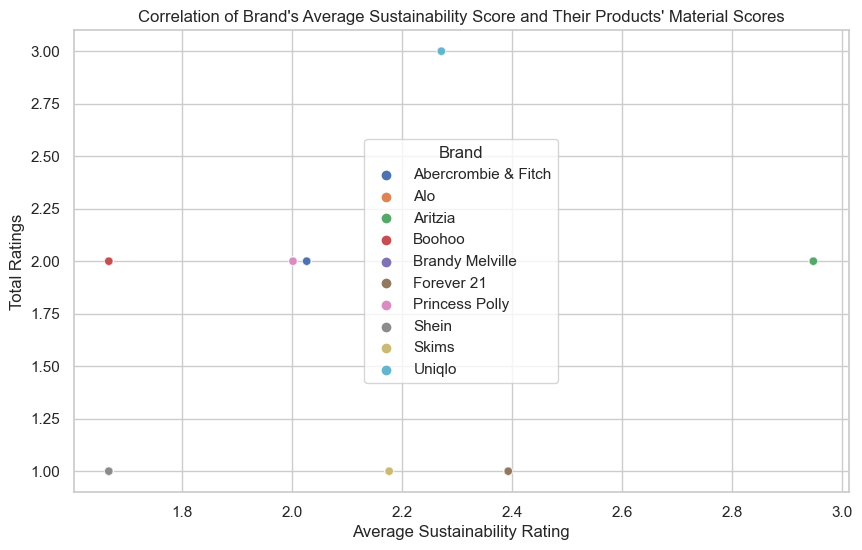

In [148]:
average_scores = data.groupby('brand')['score'].mean().reset_index()

merged_data = pd.merge(average_scores, data[['brand', 'total_ratings']], on='brand', how='left')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='score', y='total_ratings', hue='brand', alpha=0.7)
plt.xlabel('Average Sustainability Rating')
plt.ylabel('Total Ratings')
plt.title("Correlation of Brand's Average Sustainability Score and Their Products' Material Scores")
plt.legend(title='Brand')
plt.show()


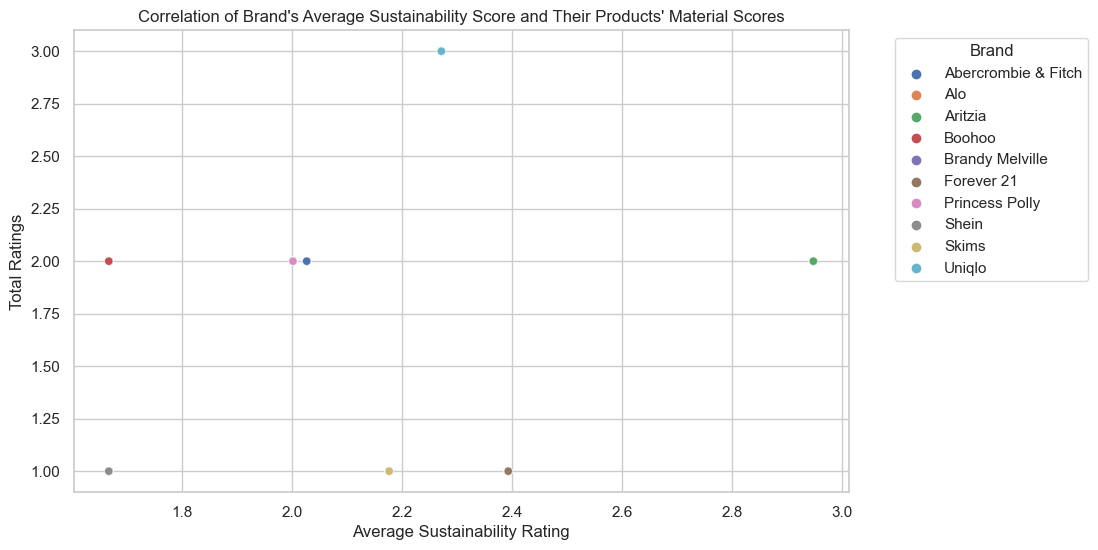

In [169]:

average_scores = data.groupby('brand')['score'].mean().reset_index()

merged_data = pd.merge(average_scores, data[['brand', 'total_ratings']], on='brand', how='left')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='score', y='total_ratings', hue='brand', alpha=0.7)
plt.xlabel('Average Sustainability Rating')
plt.ylabel('Total Ratings')
plt.title("Correlation of Brand's Average Sustainability Score and Their Products' Material Scores")
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [153]:
data

,brand,total_ratings,item,score
0,Princess Polly,2.0,Lydie Cargo Mini Skirt Beige,1.666667
1,Princess Polly,2.0,Back In Time Top White,3.100000
2,Princess Polly,2.0,Xena Denim Shorts,3.000000
3,Princess Polly,2.0,Janea Bikini Bottoms Rust,1.666667
4,Princess Polly,2.0,Janea Bikini Top Rust,1.666667
...,...,...,...,...
95,Skims,1.0,Fits Everybody Scoop Bralette Onyx,1.666667
96,Skims,1.0,Fits Everybody High Neck Bodysuit Onyx,1.666667
97,Skims,1.0,Essential Long Sleeve Scoop Neck Bodysuit Onyx,1.666667
98,Skims,1.0,Essential Crew Neck Long Sleeve Bodysuit Onyx,1.666667


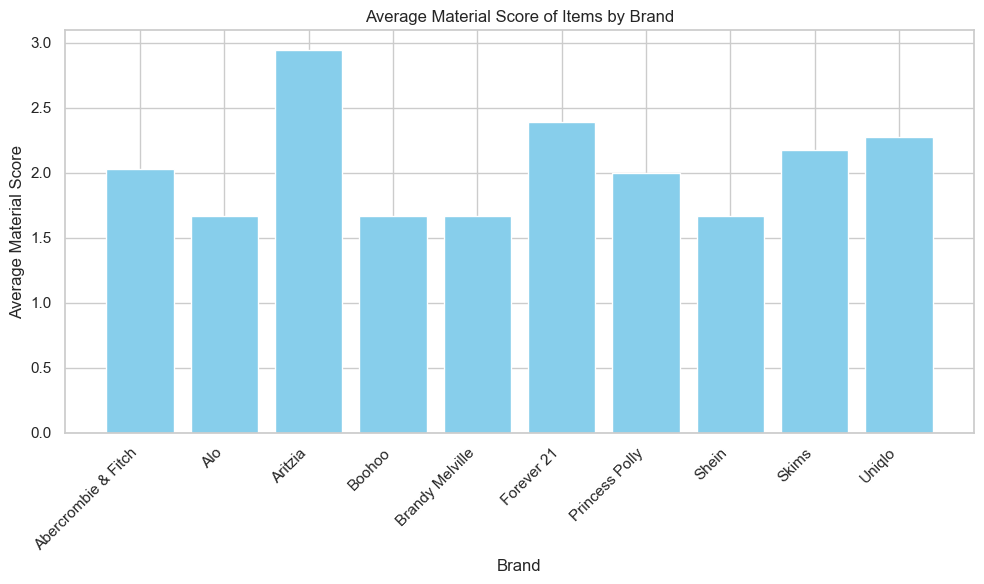

In [172]:
df = data

avg_scores = df.groupby('brand')['score'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_scores['brand'], avg_scores['score'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Material Score')
plt.title('Average Material Score of Items by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

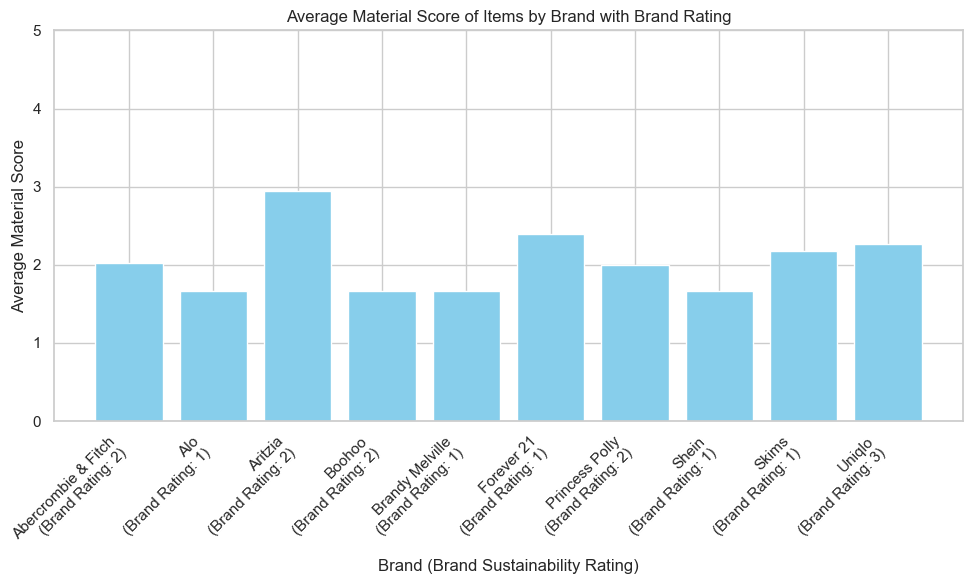

In [173]:
total_ratings_df = pd.DataFrame({
    'brand': ['Princess Polly', 'Brandy Melville', 'Shein', 'Abercrombie & Fitch', 'Forever 21', 
              'Alo', 'Aritzia', 'Uniqlo', 'Boohoo', 'Skims'],
    'total_ratings': [2, 1, 1, 2, 1, 1, 2, 3, 2, 1]  
})

avg_scores = df.groupby('brand')['score'].mean().reset_index()

merged_df = pd.merge(avg_scores, total_ratings_df, on='brand', how='left')

merged_df['brand_with_ratings'] = merged_df['brand'] + '\n(Brand Rating: ' + merged_df['total_ratings'].astype(str) + ')'

plt.figure(figsize=(10, 6))
bars = plt.bar(merged_df['brand_with_ratings'], merged_df['score'], color='skyblue')

plt.xlabel('Brand (Brand Sustainability Rating)')
plt.ylabel('Average Material Score')
plt.title('Average Material Score of Items by Brand with Brand Rating')
plt.ylim(0, 5)  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
